In [156]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

thresholds = np.linspace(0.01,20,50)

FN  =  [398, 288, 186, 92, 53, 45, 39, 34, 28, 26, 24, 22, 21, 19, 16, 15, 15, 13, 12, 11, 9, 9, 8, 8, 8, 7, 6, 5, 5, 5, 5, 5, 4, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
TP  =  [2, 112, 214, 308, 347, 355, 361, 366, 372, 374, 376, 378, 379, 381, 384, 385, 385, 387, 388, 389, 391, 391, 392, 392, 392, 393, 394, 395, 395, 395, 395, 395, 396, 396, 397, 399, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
FP  =  [4, 62, 129, 218, 305, 378, 459, 554, 664, 773, 889, 992, 1118, 1203, 1311, 1402, 1506, 1596, 1671, 1742, 1805, 1861, 1910, 1948, 2004, 2030, 2069, 2100, 2124, 2148, 2179, 2207, 2232, 2253, 2274, 2292, 2309, 2338, 2359, 2372, 2391, 2408, 2425, 2435, 2446, 2457, 2468, 2479, 2486, 2490, 2492, 2495, 2496, 2497, 2498, 2498, 2499, 2499, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
TN  =  [2496, 2438, 2371, 2282, 2195, 2122, 2041, 1946, 1836, 1727, 1611, 1508, 1382, 1297, 1189, 1098, 994, 904, 829, 758, 695, 639, 590, 552, 496, 470, 431, 400, 376, 352, 321, 293, 268, 247, 226, 208, 191, 162, 141, 128, 109, 92, 75, 65, 54, 43, 32, 21, 14, 10, 8, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
false_alarm_rate  =  [0.0016, 0.0248, 0.0516, 0.0872, 0.122, 0.1512, 0.1836, 0.2216, 0.2656, 0.3092, 0.3556, 0.3968, 0.4472, 0.4812, 0.5244, 0.5608, 0.6024, 0.6384, 0.6684, 0.6968, 0.722, 0.7444, 0.764, 0.7792, 0.8016, 0.812, 0.8276, 0.84, 0.8496, 0.8592, 0.8716, 0.8828, 0.8928, 0.9012, 0.9096, 0.9168, 0.9236, 0.9352, 0.9436, 0.9488, 0.9564, 0.9632, 0.97, 0.974, 0.9784, 0.9828, 0.9872, 0.9916, 0.9944, 0.996, 0.9968, 0.998, 0.9984, 0.9988, 0.9992, 0.9992, 0.9996, 0.9996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
miss_rate  =  [0.995, 0.72, 0.465, 0.23, 0.1325, 0.1125, 0.0975, 0.085, 0.07, 0.065, 0.06, 0.055, 0.0525, 0.0475, 0.04, 0.0375, 0.0375, 0.0325, 0.03, 0.0275, 0.0225, 0.0225, 0.02, 0.02, 0.02, 0.0175, 0.015, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.01, 0.01, 0.0075, 0.0025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
hit_rate  =  [0.0050000000000000044, 0.28, 0.5349999999999999, 0.77, 0.8674999999999999, 0.8875, 0.9025, 0.915, 0.9299999999999999, 0.935, 0.94, 0.945, 0.9475, 0.9525, 0.96, 0.9625, 0.9625, 0.9675, 0.97, 0.9725, 0.9775, 0.9775, 0.98, 0.98, 0.98, 0.9825, 0.985, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.99, 0.99, 0.9925, 0.9975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



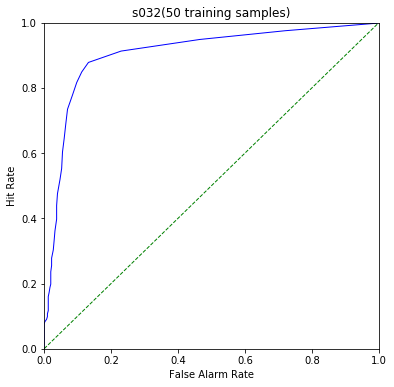

In [157]:
plt.figure(figsize=(6,6))
'''
FN_view = pd.Series(FN)
TP_view = pd.Series(TP)
FP_view = pd.Series(FP)
TN_view = pd.Series(TN)
'''


#根据Kevin的定义：
False_Alarm_Rate = list( map(lambda x: x/400, FN) )
Miss_Rate = list( map(lambda x: x/2500, FP) )
Hit_Rate = list( map(lambda x: 1 - x, Miss_Rate) )
plt.plot(False_Alarm_Rate,Hit_Rate,color="blue",linewidth=1)
plt.plot(False_Alarm_Rate,False_Alarm_Rate,'g--',linewidth=1)

plt.title('s032(50 training samples)')
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()


In [158]:
FN.index(21)

12

In [61]:
(FP[4]+FP[5])/5000

0.833

In [159]:
FP[12]/2500

0.4472

In [160]:
F1=[0.0]*len(TP)
for i in range(len(TP)):
    F1[i] = 2*TP[i]/(2*TP[i]+FP[i]+FN[i])

(F1[1]+F1[2])/2

In [162]:
F1[12]

0.3995782814971007

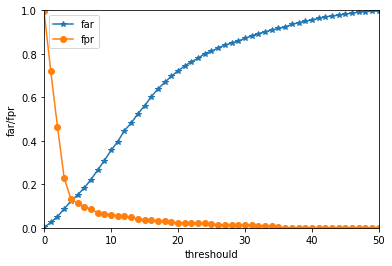

In [164]:
plt.figure()
plt.plot(false_alarm_rate,marker = '*', label = 'far')
plt.plot(miss_rate, marker = 'o', label = 'fpr')
plt.legend()
plt.xlim([0,50])
plt.ylim([0,1])
plt.xlabel('threshould')
plt.ylabel('far/fpr')
plt.show()

In [47]:
thresholds[3]

1.233877551020408

In [29]:
(thresholds[4]+thresholds[5])/2

1.845816326530612

In [167]:
(false_alarm_rate[4]+miss_rate[4])/2

0.12725

In [165]:
miss_rate[4]

0.1325

In [166]:
false_alarm_rate[4]

0.122

In [100]:
thresholds[12]

2.5244897959183676